In [142]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Employee.csv')
df.head()


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


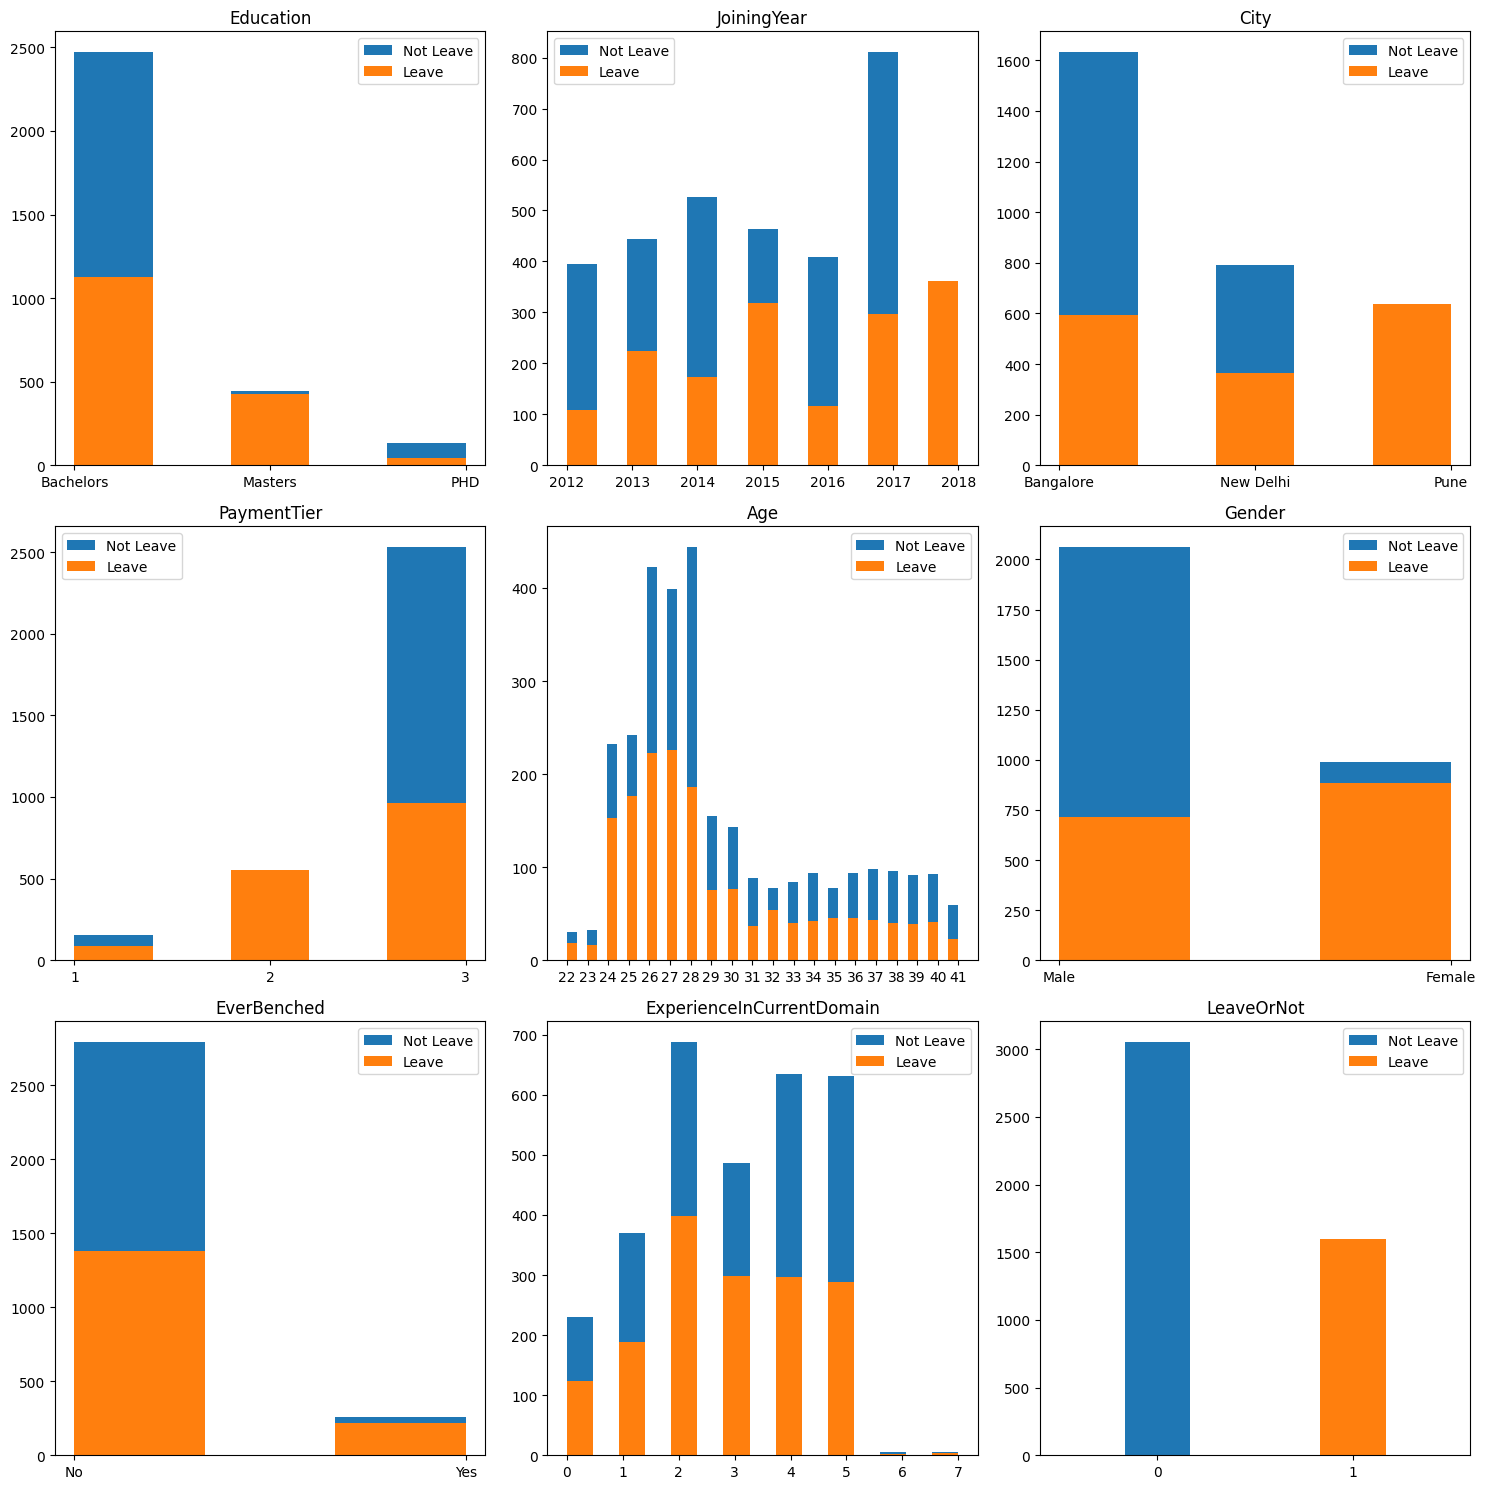

In [143]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 3, figsize=(15, 15))

target_classes = df[df.columns[-1]].unique()
custom_labels = {0: 'Not Leave', 1: 'Leave'}  

# Lặp qua từng features
for (i, column) in enumerate(df.columns):
    
    ax = axs[i//3, i%3]
    ax.set_title(column)
    unique_vals = len(df[column].unique())

    # Lặp qua từng class/label
    for label in target_classes:
        data = df[df[df.columns[-1]] == label][column]
        ax.hist(data, bins=unique_vals*2 - 1, alpha=1, label=custom_labels.get(label, str(label)))
    ax.set_xticks(df[column].unique())
    ax.set_xticklabels(df[column].unique())

    ax.legend()

plt.tight_layout()
plt.show()

# Preprocessing

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

df.nunique()
df.drop_duplicates(inplace=True)

names = df.columns
types = df.dtypes

le = LabelEncoder()
for i in range(len(types)):
    if types[i] == 'object':
        df[names[i]] = le.fit_transform(df[names[i]])

X = df.values[:,:-1]
y = df.values[:,-1]

print('Data:')
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

print('Train:')
print(X_train.shape)
print(y_train.shape)

print('Test:')
print(X_test.shape)
print(y_test.shape)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Data:
(2764, 8)
(2764,)
Train:
(2073, 8)
(2073,)
Test:
(691, 8)
(691,)


# Feed Forward Neural Network

In [145]:
from tensorflow import keras
from keras import layers

ffnn = keras.Sequential([
    layers.Dense(32, activation="sigmoid", input_shape=(X_train.shape[1],)),
    # layers.Dense(128, activation="sigmoid"),
    # layers.Dense(64, activation="sigmoid"),
    # layers.Dense(32, activation="sigmoid"),
    # layers.Dense(16, activation="sigmoid"),
    layers.Dense(1, activation="softmax")
])

ffnn.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss="binary_crossentropy", metrics=["accuracy"])

result = ffnn.fit(X_train, y_train, epochs=25, verbose=1)

e = 0
y_pred = ffnn.predict(X_test)
for i in range(len(y_pred)):
    if y_pred[i] != y_test[i]:
        e += 1
print(e)

Epoch 1/25
65/65 [==============================] - 1s 2ms/step - loss: 0.6524 - accuracy: 0.3912
Epoch 2/25
65/65 [==============================] - 0s 2ms/step - loss: 0.6359 - accuracy: 0.3912
Epoch 3/25
65/65 [==============================] - 0s 2ms/step - loss: 0.6309 - accuracy: 0.3912
Epoch 4/25
65/65 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.3912
Epoch 5/25
65/65 [==============================] - 0s 2ms/step - loss: 0.6327 - accuracy: 0.3912
Epoch 6/25
65/65 [==============================] - 0s 2ms/step - loss: 0.6272 - accuracy: 0.3912
Epoch 7/25
65/65 [==============================] - 0s 1ms/step - loss: 0.6252 - accuracy: 0.3912
Epoch 8/25
65/65 [==============================] - 0s 2ms/step - loss: 0.6255 - accuracy: 0.3912
Epoch 9/25
65/65 [==============================] - 0s 2ms/step - loss: 0.6225 - accuracy: 0.3912
Epoch 10/25
65/65 [==============================] - 0s 2ms/step - loss: 0.6197 - accuracy: 0.3912
Epoch 11/25
65/65 [

# Recurrent Neural Network

In [146]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

# Assuming each input data point has 10 timesteps, each with 30 features
input_shape = (8)

X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(1,8)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

result = model.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test), verbose=1)

e = 0
y_pred = (model.predict(X_test) > 0.5).astype(int)
for i in range(len(y_pred)):
    if y_pred[i] != y_test[i]:
        e += 1
print(e)

Epoch 1/25
65/65 [==============================] - 1s 5ms/step - loss: 0.6680 - accuracy: 0.5890 - val_loss: 0.6554 - val_accuracy: 0.6049
Epoch 2/25
65/65 [==============================] - 0s 2ms/step - loss: 0.6433 - accuracy: 0.6348 - val_loss: 0.6419 - val_accuracy: 0.6382
Epoch 3/25
65/65 [==============================] - 0s 3ms/step - loss: 0.6312 - accuracy: 0.6768 - val_loss: 0.6316 - val_accuracy: 0.6570
Epoch 4/25
65/65 [==============================] - 0s 3ms/step - loss: 0.6221 - accuracy: 0.6860 - val_loss: 0.6237 - val_accuracy: 0.6773
Epoch 5/25
65/65 [==============================] - 0s 2ms/step - loss: 0.6163 - accuracy: 0.6821 - val_loss: 0.6178 - val_accuracy: 0.6729
Epoch 6/25
65/65 [==============================] - 0s 3ms/step - loss: 0.6097 - accuracy: 0.6836 - val_loss: 0.6111 - val_accuracy: 0.6729
Epoch 7/25
65/65 [==============================] - 0s 3ms/step - loss: 0.6036 - accuracy: 0.6860 - val_loss: 0.6053 - val_accuracy: 0.6744
Epoch 8/25
65/65 [==